In [ ]:
#Importing Packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
#Importing Dataset
from keras.datasets import mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Normalizing Dataset
train_img = train_img.reshape(60000, 28,28,1)
test_img = test_img.reshape(10000,28,28,1)
train_img = keras.utils.normalize(train_img, axis=1)
test_img = keras.utils.normalize(test_img, axis =1)

In [ ]:
#Building Model
model=Sequential()
model.add(Conv2D(32,(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(16, (3,3)))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation="softmax"))

In [ ]:
#Compiling Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
#Fitting the Model
model.fit(train_img, train_lab, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.2716 - accuracy: 0.9168
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0878 - accuracy: 0.9732
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0618 - accuracy: 0.9806
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0478 - accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0389 - accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0321 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [ ]:
#Evaluate the Model
print(model.evaluate(test_img, test_lab))

313/313 [==============================] - 3s 8ms/step - loss: 0.0533 - accuracy: 0.9835
[0.05325322225689888, 0.9835000038146973]


In [ ]:
#Predicting First 10 test images
pred = model.predict(test_img[:10])
# print(pred)
p=np.argmax(pred, axis=1)
print(p)
print(test_lab[:10])

1/1 [==============================] - 0s 137ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


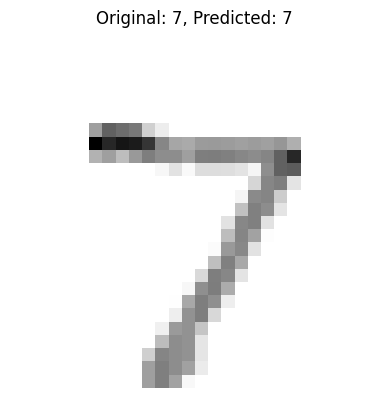

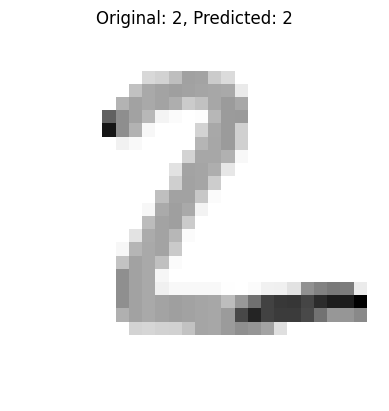

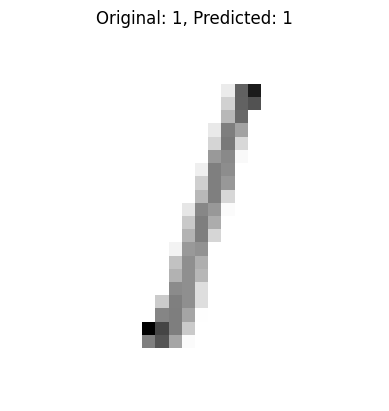

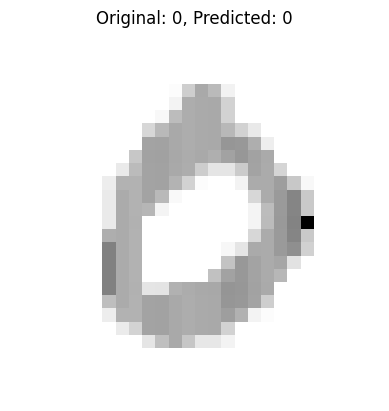

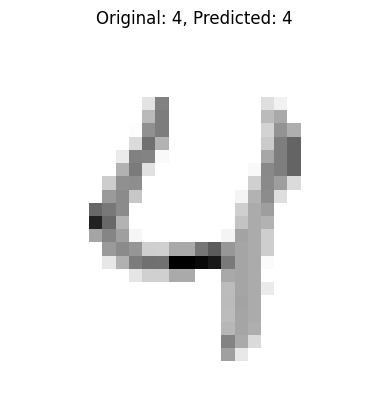

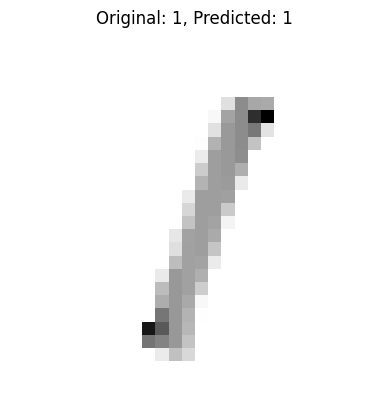

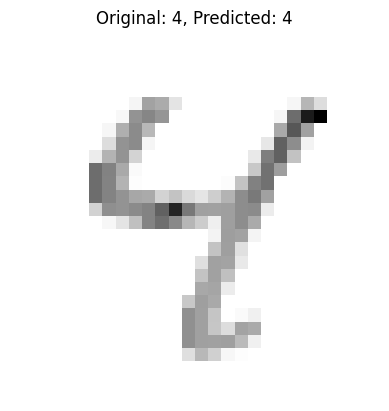

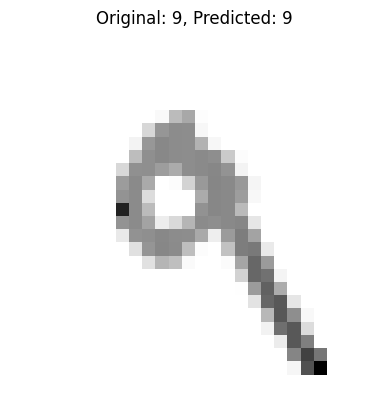

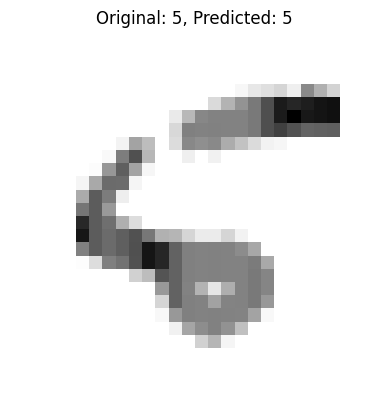

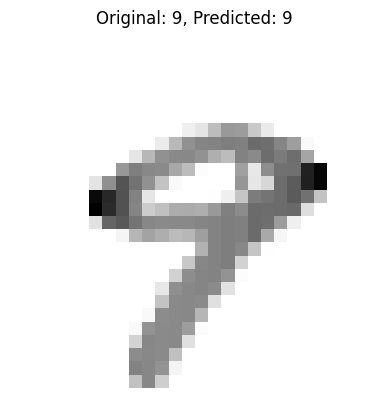

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualizing prediction
for i in range(10):
  plt.imshow(test_img[i].reshape((28,28)), cmap='binary')
  plt.title("Original: {}, Predicted: {}".format(test_lab[i], p[i]))
  plt.axis("Off")
  plt.figure()